https://www.stat.berkeley.edu/~mgoldman/Section0402.pdf
    
https://www.kdnuggets.com/2016/07/big-data-bible-codes-bonferroni.html

In [1]:
import random
import string
import time
import matplotlib.pyplot as plt

use the "string" module to get a list of characters in the alphabet

In [2]:
string.ascii_uppercase

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

Generate a string of size N

In [3]:
N=10

In [4]:
26**N

141167095653376

to generate the 10 character random string, we could write a loop:

In [5]:
start=time.time()
this_str=[]
for digit_indx in range(N):
    a_char=random.choice(string.ascii_uppercase) 
    this_str.append(a_char)
    
print(''.join(this_str))
print(time.time()-start,'seconds')

NIRXMZMITF
0.001965761184692383 seconds


A much shorter way to write the same loop is

In [6]:
my_str=''.join(random.choice(string.ascii_uppercase) for _ in range(N)) # select a random character N times
my_str

'ZAUKFNKXRL'

Find a "pattern" in random data:

In [7]:
def one_match(str_to_match,number_of_random_strings_to_inspect,str_len,prt_bool):
    """
    inputs: 
       * a string to find within a randomly generated string
       * the number of tests to run
       * a boolean to either print or not print output
    outputs:
       * the number of times the input string appears in a random string
    """
    # count the number of matches for the input and the random strings
    number_of_results=0
    for test_indx in range(number_of_random_strings_to_inspect): # ct = number of test to run
        # generate a random string
        my_str=''.join(random.choice(string.ascii_uppercase) for _ in range(str_len))
        # test to determine whether the input string is in the random string
        if (str_to_match in my_str):
            # if a match is found, increment the success counter
            number_of_results+=1
            if prt_bool:
                print(my_str)
    if prt_bool:
        print('number of results:',number_of_results)
    return(number_of_results)

In [8]:
one_match('A',10,N,True)

JGAOEAJINF
GHKAVOGFXN
number of results: 2


2

In [9]:
one_match('AAA',10,N,True)

number of results: 0


0

The probability of getting "A" in the first position of the 10 character string is 1/26.
The probability of getting "A" in the second position of the 10 character string is 1/26.
The probability of getting "A" in the third position of the 10 character string is 1/26.
Therfore, the chance of getting "AAA" in the first three character is 

In [10]:
(1/26)*(1/26)*(1/26)

5.689576695493856e-05

I don't care where "AAA" shows up in the 10 character string, so the outcome for any of the 3 adjacent letters is

In [11]:
prob_find_AAA=(
# AAA_______
((1/26)**3)+
# _AAA______
((1/26)**3)+
# __AAA_____
((1/26)**3)+
# ___AAA____
((1/26)**3)+
# ____AAA___
((1/26)**3)+
# _____AAA__
((1/26)**3)+
# ______AAA_
((1/26)**3)+
# _______AAA
((1/26)**3)
)

prob_find_AAA

0.00045516613563950854

In [12]:
number_of_tests_to_run=10000

If we run 10,000 tests, what's the average number of matches?

In [13]:
round(number_of_tests_to_run*prob_find_AAA,2)

4.55

In [14]:
one_match('AAA',number_of_tests_to_run,N,True)

RRHJCFAAAT
SSWAAANWOT
PWRGOPIAAA
AAABWRXNMD
VMAAAQYYHD
ZJWAAAMTGQ
number of results: 6


6

The more "patterns" we look for, the more successes we will find. 

This is the problem addressed by the Bonferroni's principle.

Solution: normalize your "successes" count by the number of patterns you're looking for

In [15]:
def two_matches(str1_to_match,
                str2_to_match,
                number_of_random_strings_to_inspect,
                str_len,
                prt_bool):
    number_of_results=0
    for test_indx in range(number_of_random_strings_to_inspect):
        my_str=''.join(random.choice(string.ascii_uppercase) for _ in range(str_len))
        if (str1_to_match in my_str) or (str2_to_match in my_str):
            number_of_results+=1
            if prt_bool:
                print(my_str)
    if prt_bool:
        print('number of results:',number_of_results)
    return(number_of_results)

In [16]:
rst_ct=two_matches('AAA','BBB',number_of_tests_to_run,N,True)

BBBGEYLRRC
UXUAAAIBVU
TCHUJHBBBD
HZJRBBBUPG
MKHWIAAAKM
MVSAAAIAAG
SIXXJZEAAA
BBBTFEUXVL
YJKLZPHBBB
BBCNUPVAAA
HBBBUXMJPA
BBBJKPIMIP
BTPBBBJHFU
GYOELIUBBB
AAAMIUMAHZ
number of results: 15


That's higher than when we searched for only 'AAA'

Though we found more results, we need to normalize the count by the number of searches we made:

In [17]:
rst_ct/2

7.5

which is close to the original expection

In [18]:
round(number_of_tests_to_run*prob_find_AAA,2)

4.55

# the rest of this content is irrelevant

Caveat: the following takes a long time (about 2 minutes) to run

In [19]:
start=time.time()
list_of_results=[]
for indx in range(1000):
    rst_ct=two_matches('AAA','BBB',number_of_tests_to_run,N,False)
    list_of_results.append(rst_ct)
print(time.time()-start)

287.4848086833954


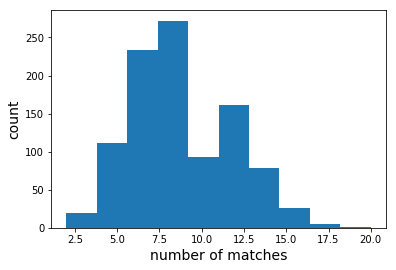

In [20]:
_=plt.hist(list_of_results)
_=plt.xlabel('number of matches',fontsize=14)
_=plt.ylabel('count',fontsize=14)

<BR>
    <BR>
        <BR>
            <BR>
                <BR>
                    <BR>
As we scale up the amount of data we search, we find more successes

As we scale up the data size, we can find increasingly rare patterns

'AAA' shows up often; 'AAAA' less often

<BR>
Because doing analysis at scale is costly (in terms of money, time, skills), <BR>
    there's increased incentive to perform test efficiently.
<BR>
<BR>
Solution: normalize your "successes" by the number of patterns you're looking for